In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import umap

c:\Users\schni\OneDrive\Documents\Switzerland\Bottmedical\.venv\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\schni\OneDrive\Documents\Switzerland\Bottmedical\.venv\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\schni\OneDrive\Documents\

In [2]:
# Import the batch file

batch_path = os.path.join(os.getcwd(), "Batch_runs_convolution")
file_path = os.path.join(batch_path, "Default_batch_5.csv")
try_batch = pd.read_csv(file_path)
try_batch = try_batch.iloc[:,1:]

In [3]:
# Separate each run into a separate df

grouped = try_batch.groupby('RunId')
batch_by_runs = {name: group for name, group in grouped}    

0 Final_State    Pseudo-steady state, predator domination
dtype: object


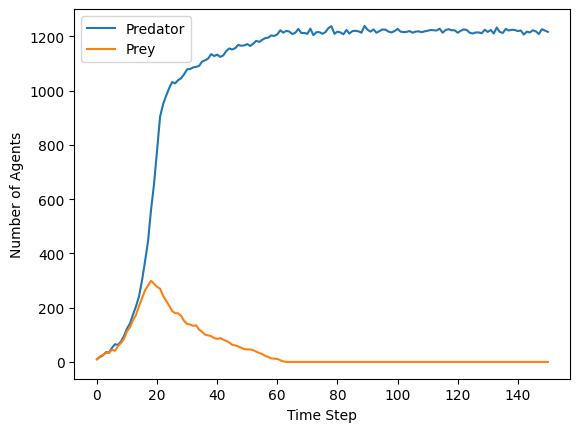

1 Final_State    Pseudo-steady state, predator domination
dtype: object


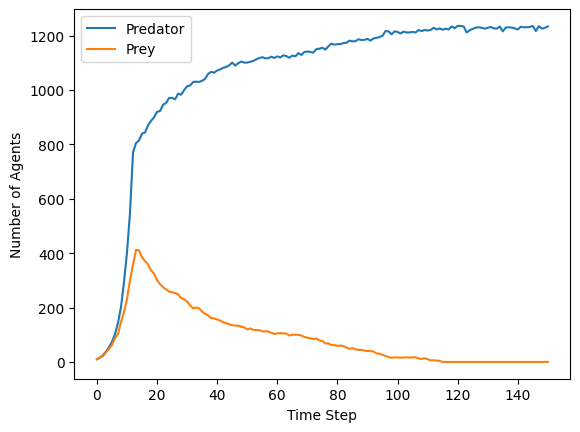

2 Final_State    Predator domination
dtype: object


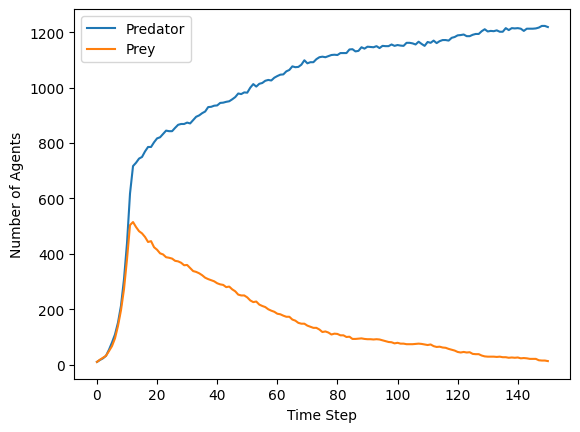

3 Final_State    Pseudo-steady state, predator domination
dtype: object


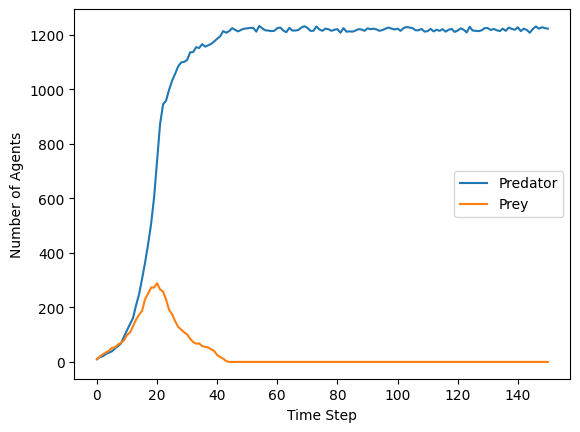

4 Final_State    Steady state, predator domination
dtype: object


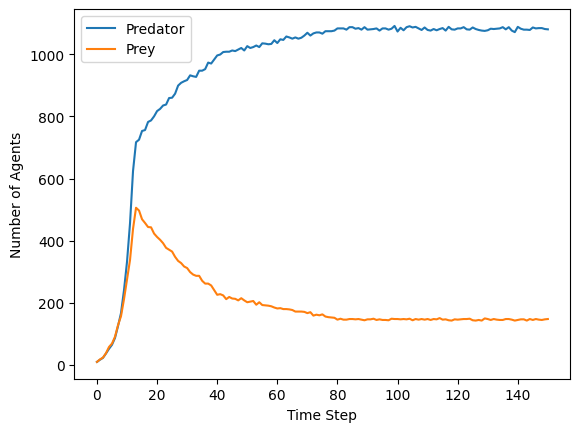

5 Final_State    Predator domination
dtype: object


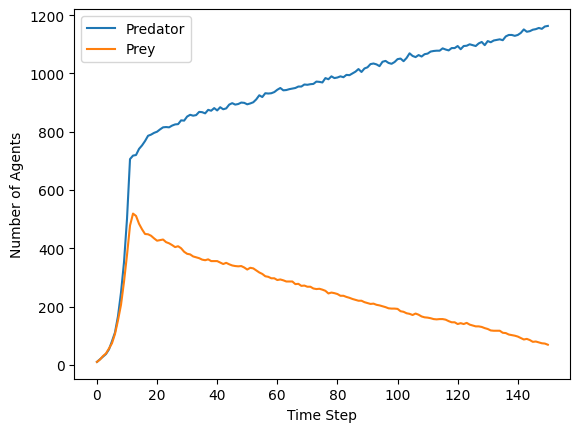

6 Final_State    Pseudo-steady state, predator domination
dtype: object


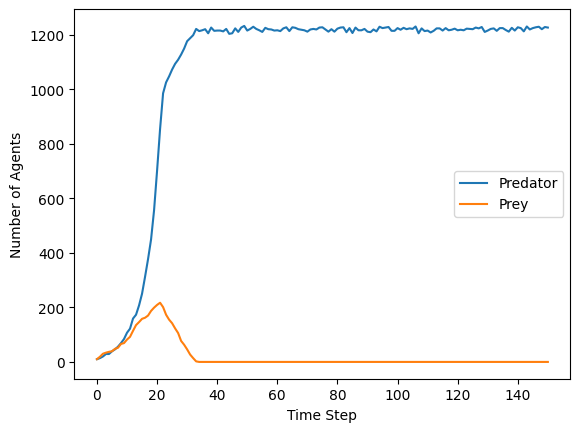

7 Final_State    Predator domination
dtype: object


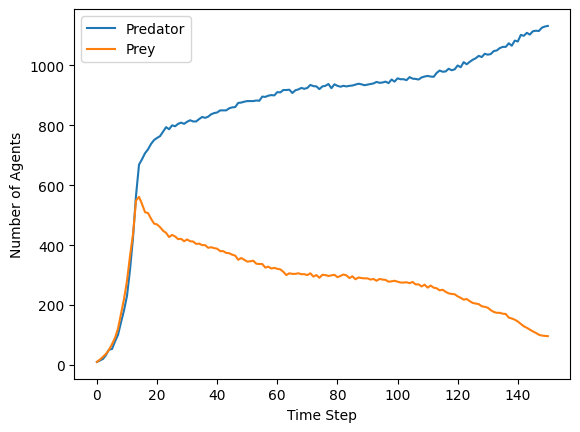

8 Final_State    Pseudo-steady state, predator domination
dtype: object


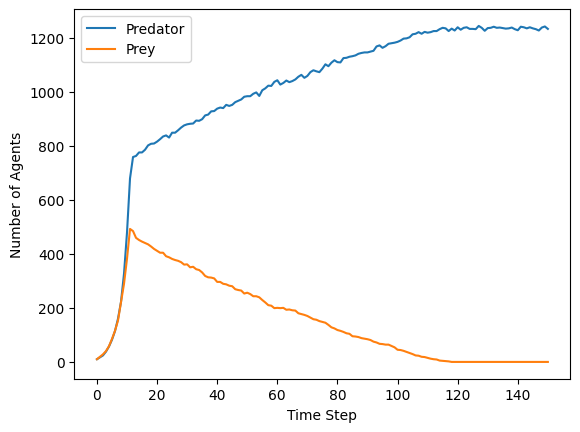

9 Final_State    Pseudo-steady state, predator domination
dtype: object


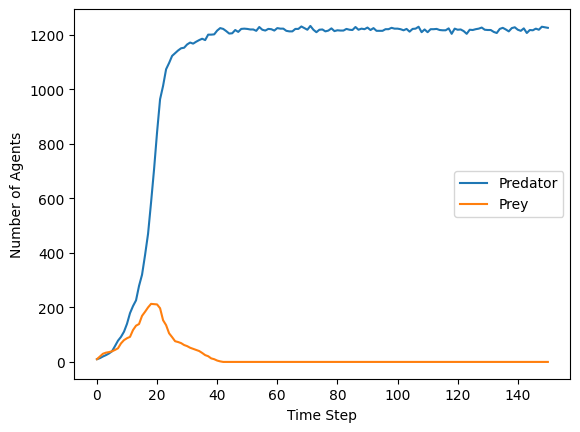

10 Final_State    Pseudo-steady state, predator domination
dtype: object


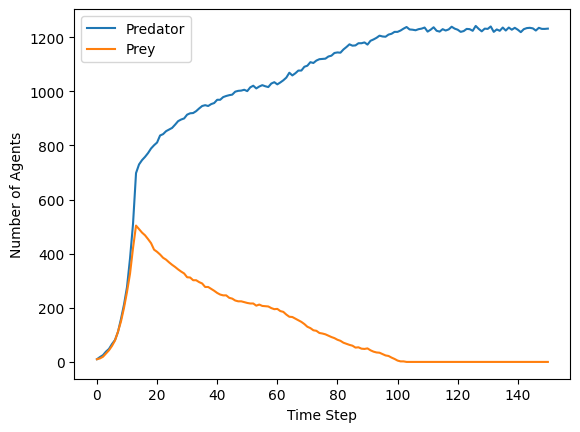

11 Final_State    Pseudo-steady state, predator domination
dtype: object


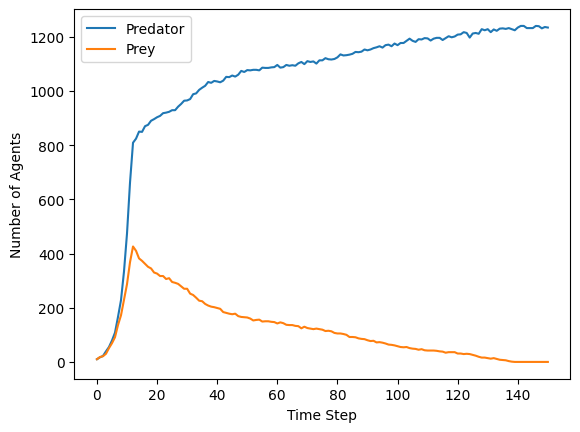

12 Final_State    Pseudo-steady state, predator domination
dtype: object


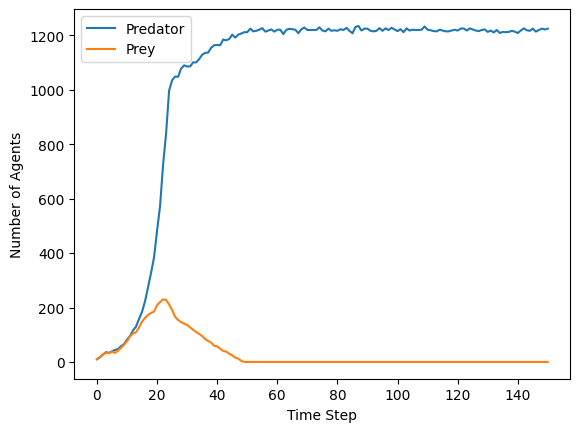

13 Final_State    Pseudo-steady state, predator domination
dtype: object


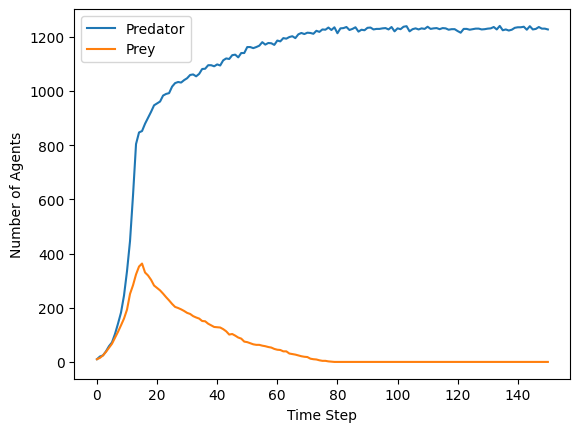

14 Final_State    Pseudo-steady state, predator domination
dtype: object


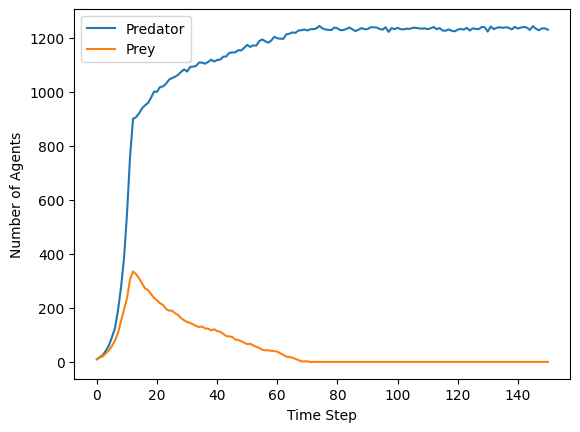

15 Final_State    Pseudo-steady state, predator domination
dtype: object


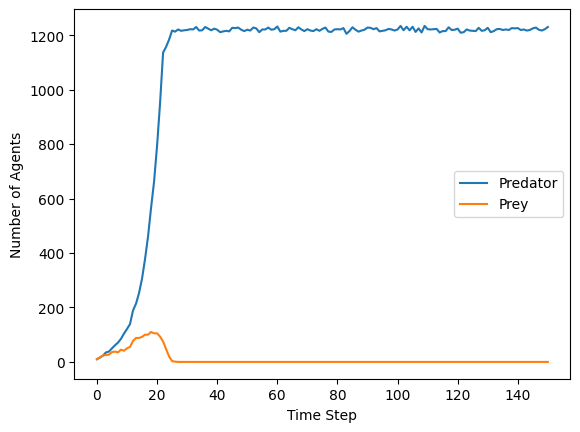

16 Final_State    Steady state, predator domination
dtype: object


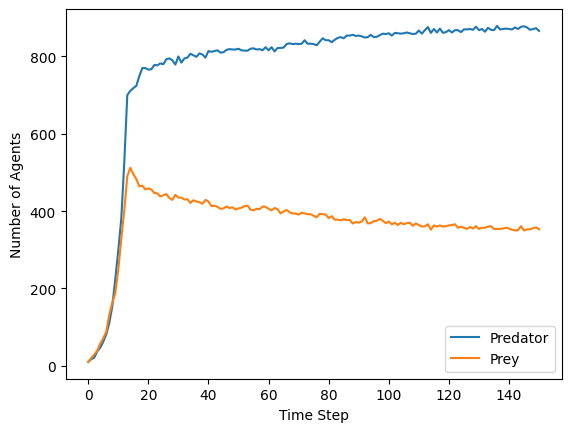

17 Final_State    Pseudo-steady state, predator domination
dtype: object


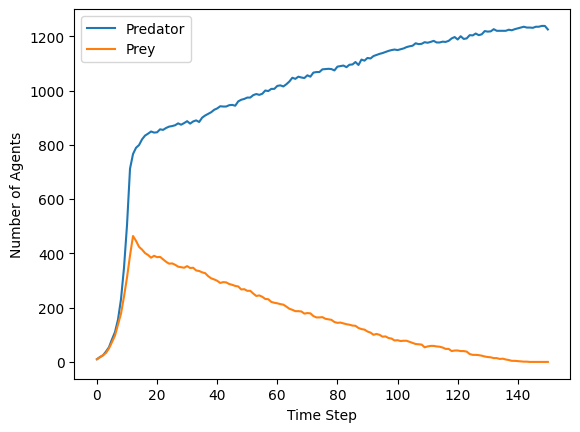

18 Final_State    Pseudo-steady state, predator domination
dtype: object


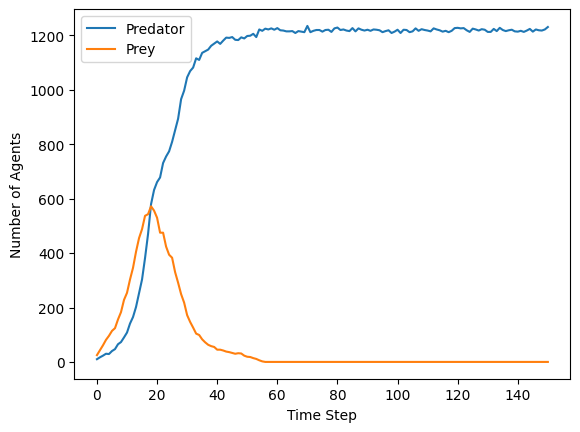

19 Final_State    Steady state, prey domination
dtype: object


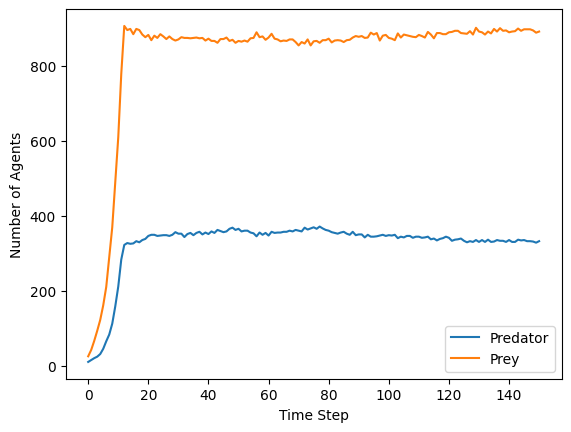

20 Final_State    Prey domination
dtype: object


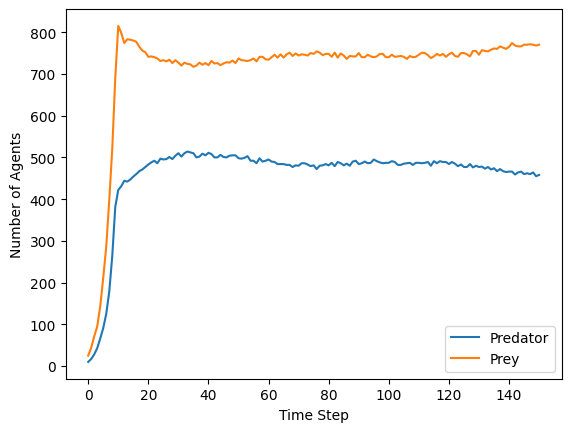

21 Final_State    Pseudo-steady state, predator domination
dtype: object


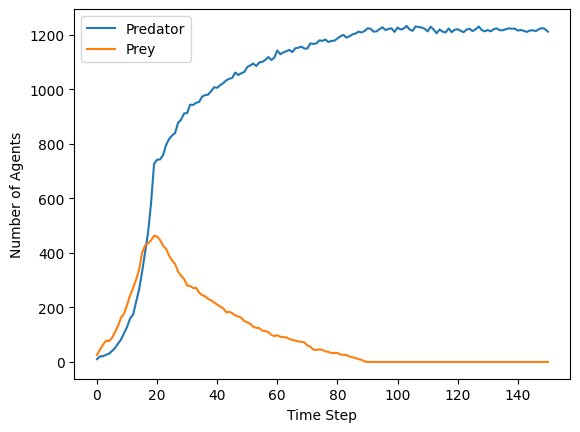

22 Final_State    Steady state, predator domination
dtype: object


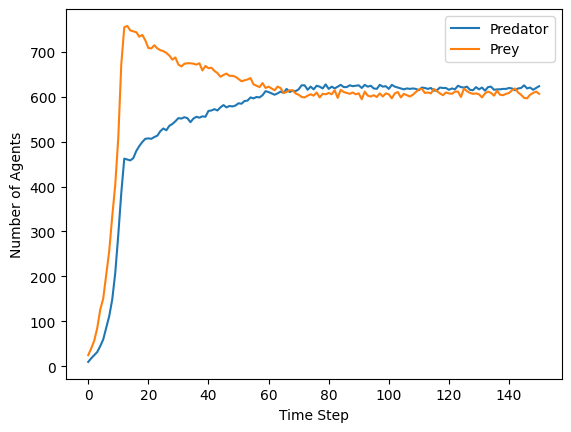

23 Final_State    Predator domination
dtype: object


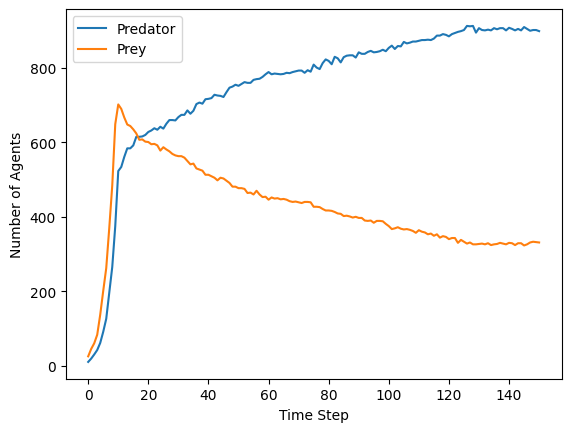

24 Final_State    Pseudo-steady state, predator domination
dtype: object


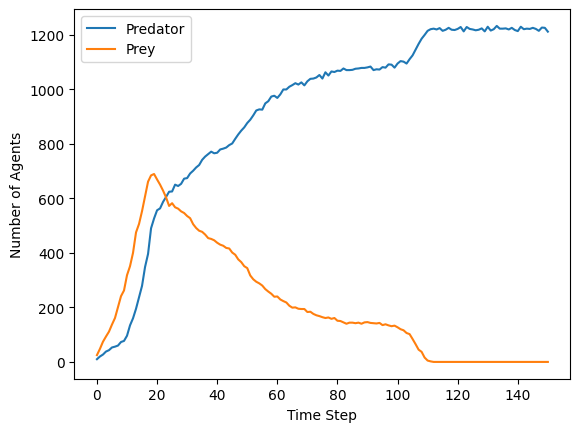

25 Final_State    Steady state, predator domination
dtype: object


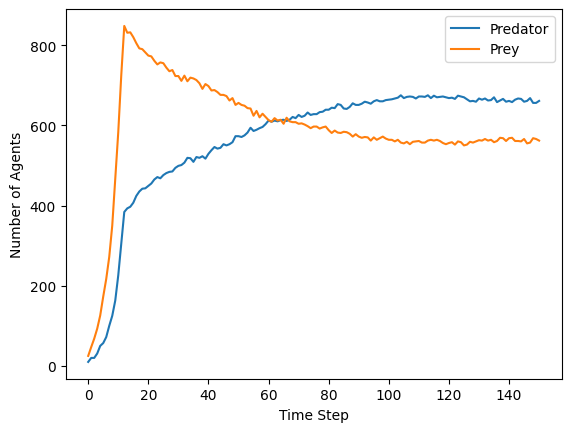

26 Final_State    Prey domination
dtype: object


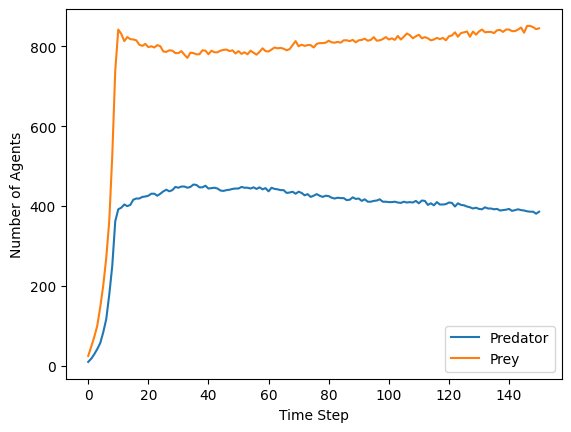

27 Final_State    Pseudo-steady state, predator domination
dtype: object


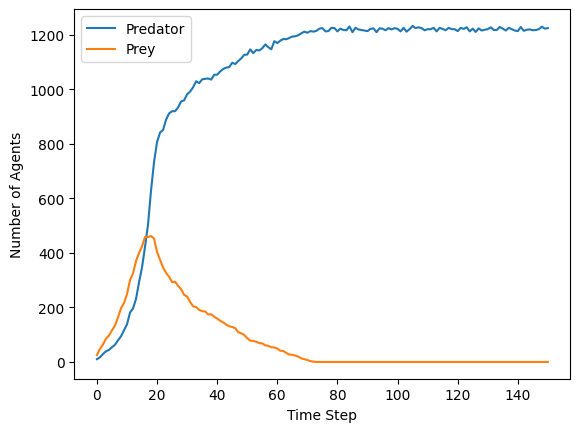

28 Final_State    Predator domination
dtype: object


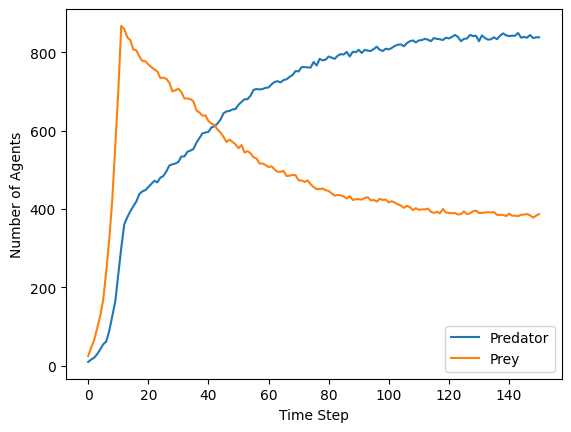

29 Final_State    Steady state, predator domination
dtype: object


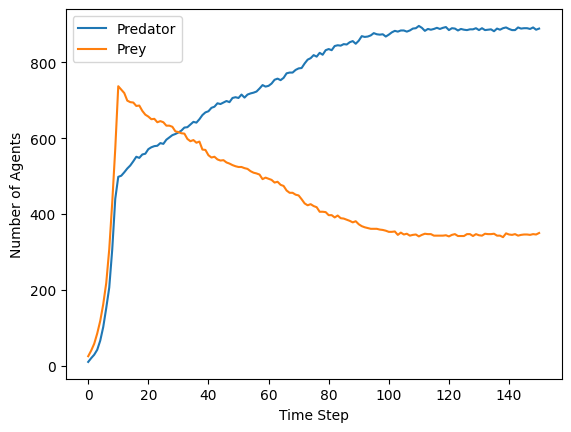

30 Final_State    Predator domination
dtype: object


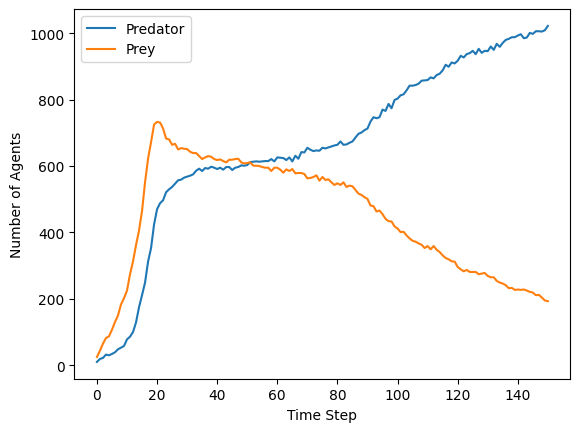

31 Final_State    Predator domination
dtype: object


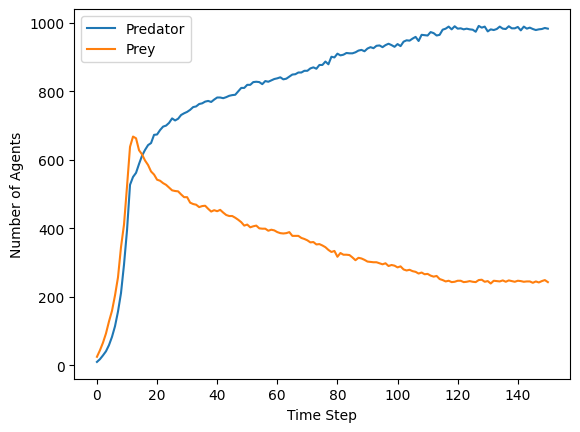

32 Final_State    Predator domination
dtype: object


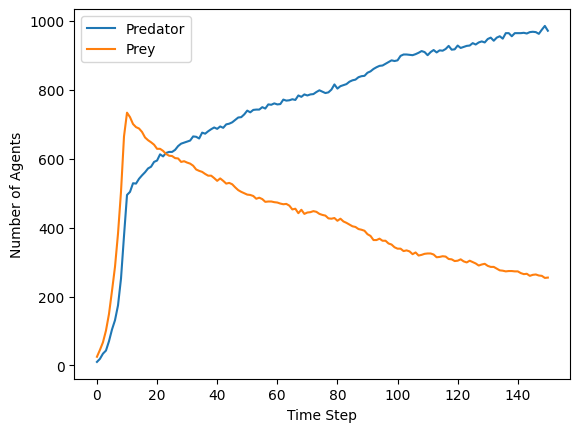

33 Final_State    Pseudo-steady state, predator domination
dtype: object


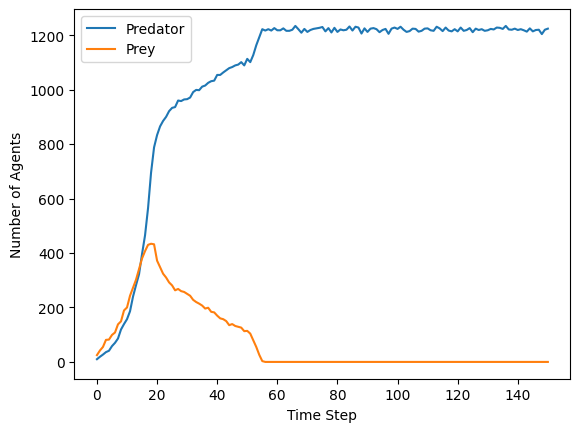

34 Final_State    Predator domination
dtype: object


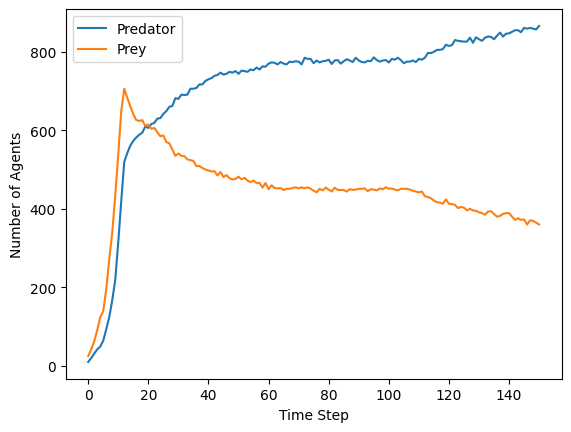

35 Final_State    Steady state, predator domination
dtype: object


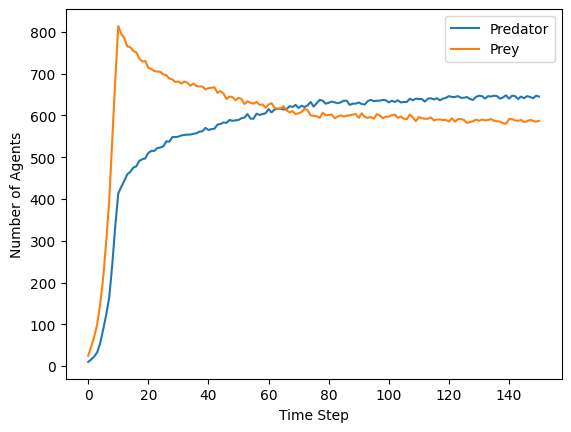

36 Final_State    Predator domination
dtype: object


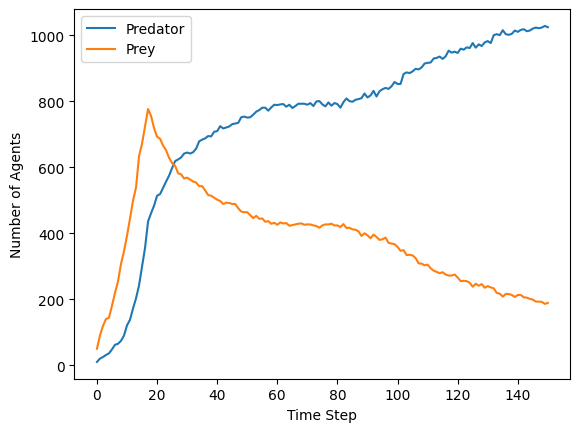

37 Final_State    Steady state, prey domination
dtype: object


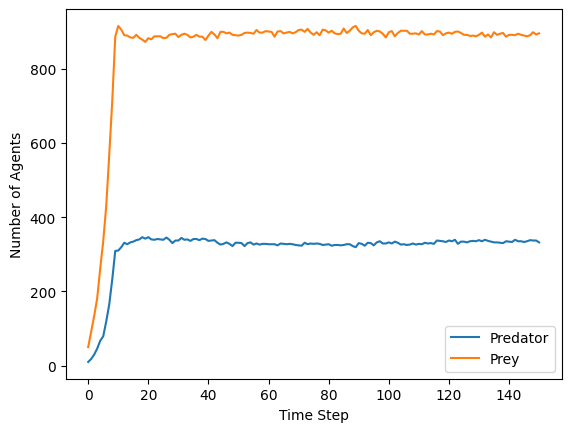

38 Final_State    Steady state, prey domination
dtype: object


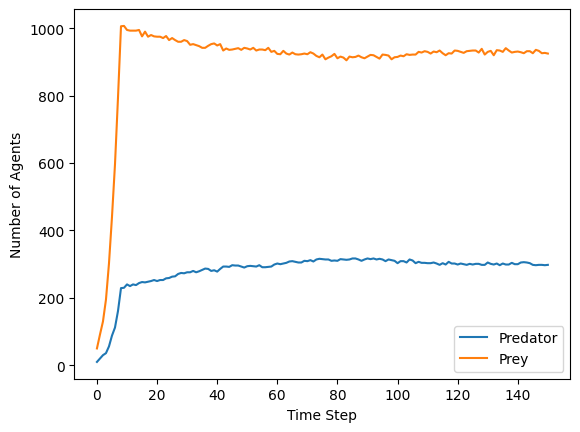

39 Final_State    Predator domination
dtype: object


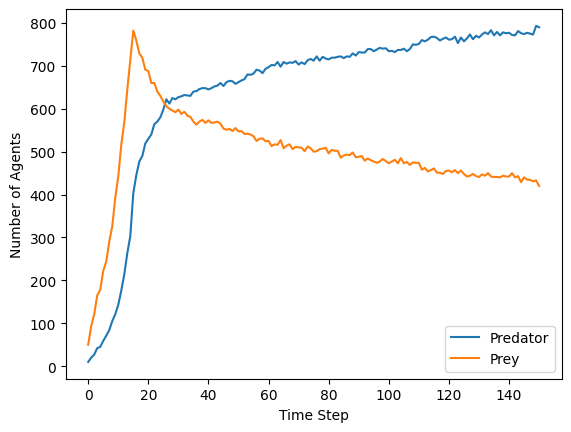

40 Final_State    Steady state, prey domination
dtype: object


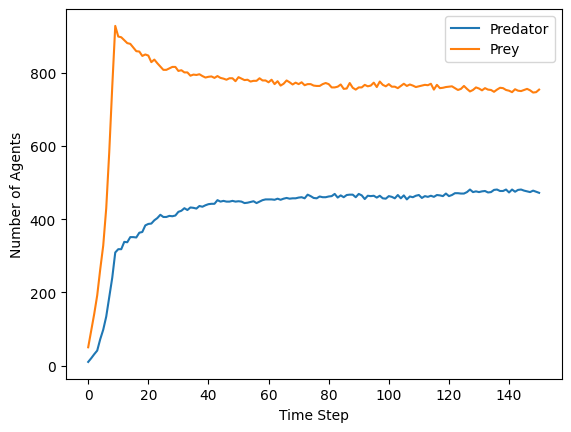

41 Final_State    Steady state, prey domination
dtype: object


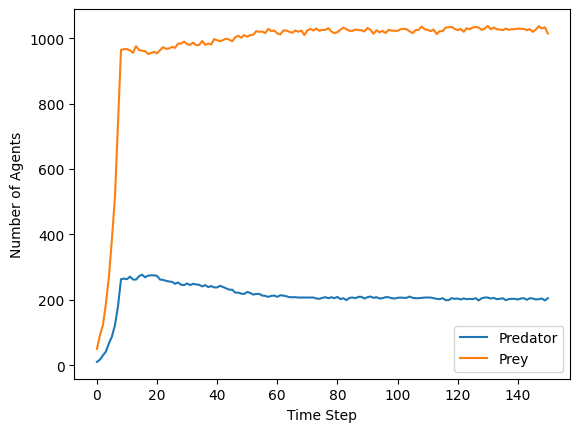

42 Final_State    Predator domination
dtype: object


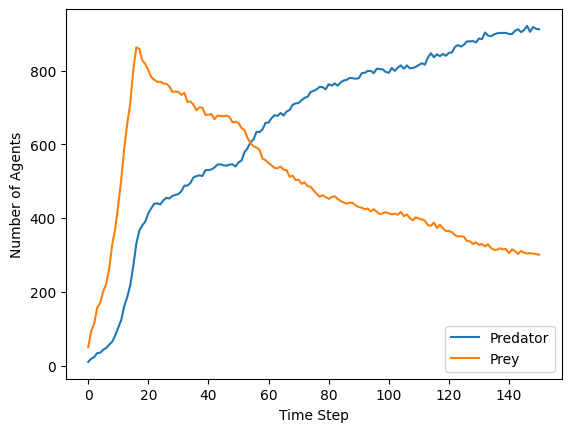

43 Final_State    Prey domination
dtype: object


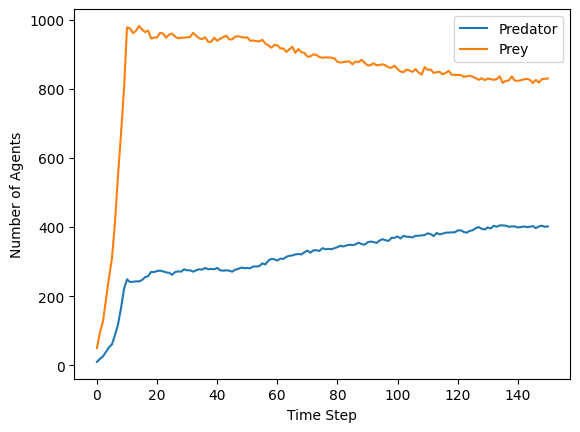

44 Final_State    Steady state, prey domination
dtype: object


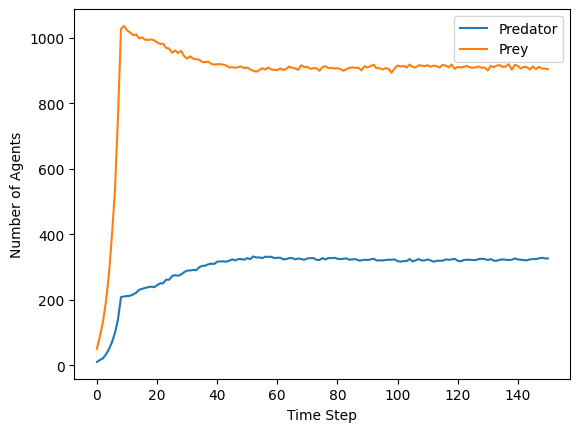

45 Final_State    Predator domination
dtype: object


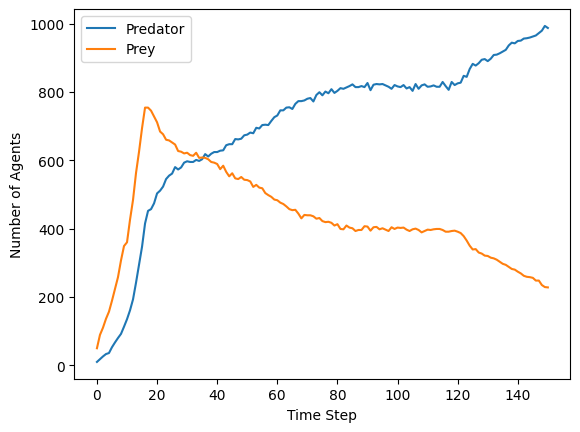

46 Final_State    Prey domination
dtype: object


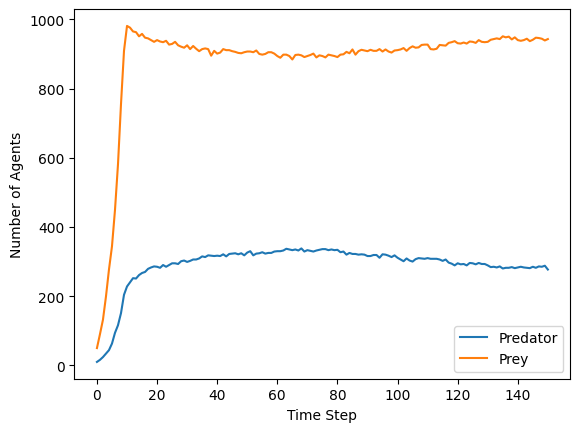

47 Final_State    Steady state, prey domination
dtype: object


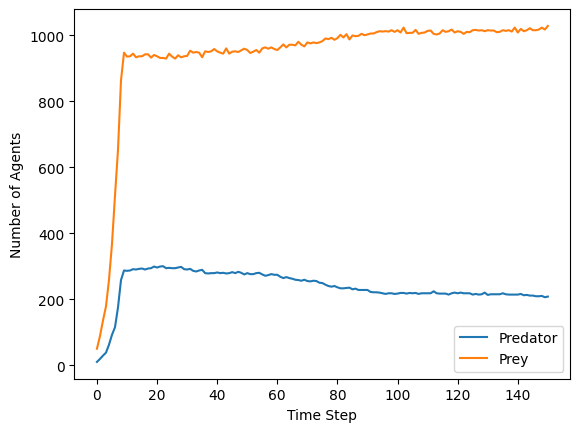

48 Final_State    Prey domination
dtype: object


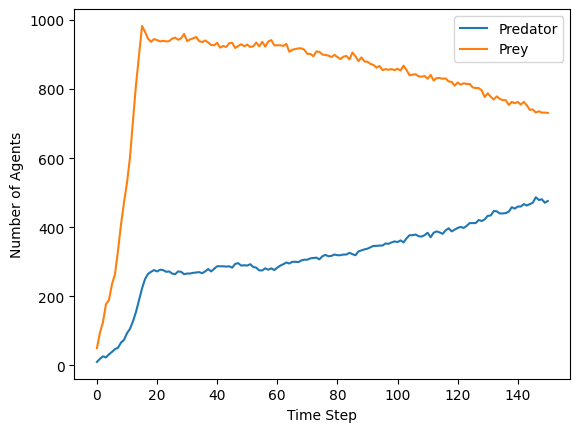

49 Final_State    Steady state, prey domination
dtype: object


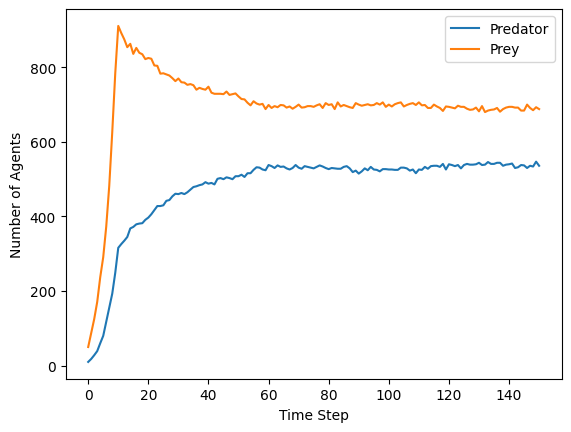

50 Final_State    Steady state, prey domination
dtype: object


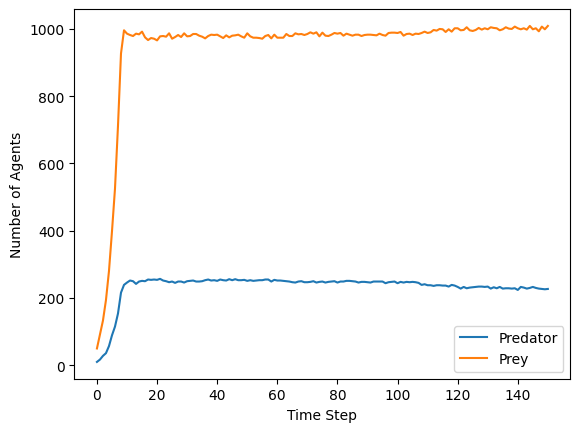

51 Final_State    Pseudo-steady state, predator domination
dtype: object


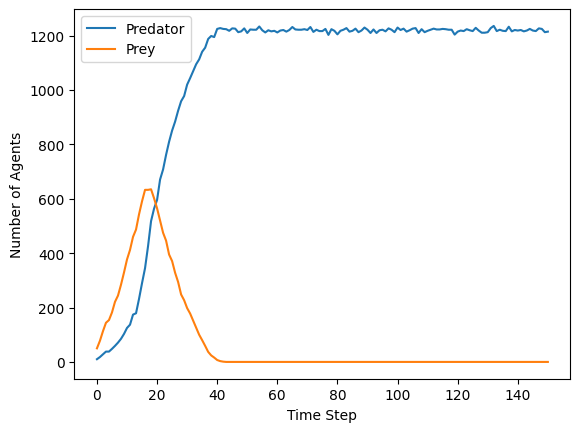

52 Final_State    Steady state, prey domination
dtype: object


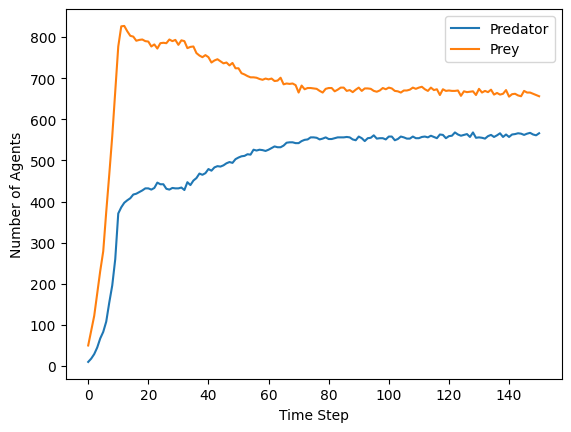

53 Final_State    Steady state, predator domination
dtype: object


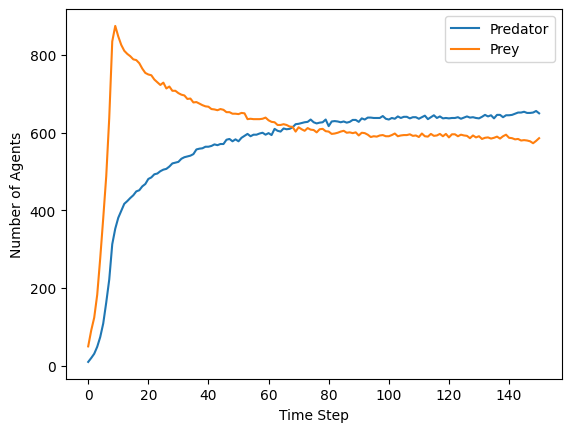

54 Final_State    Pseudo-steady state, predator domination
dtype: object


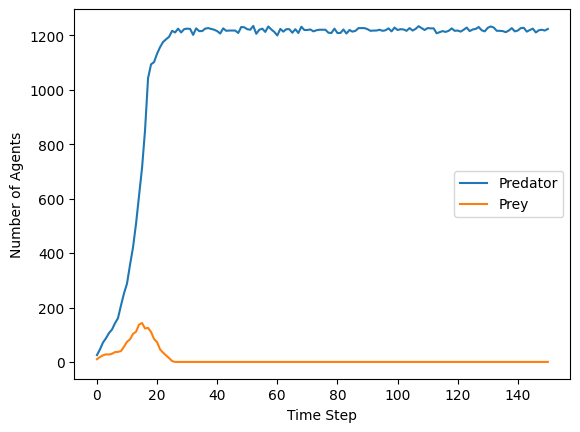

55 Final_State    Pseudo-steady state, predator domination
dtype: object


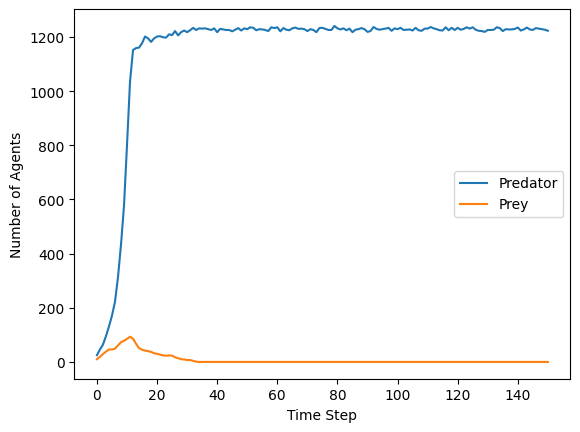

56 Final_State    Pseudo-steady state, predator domination
dtype: object


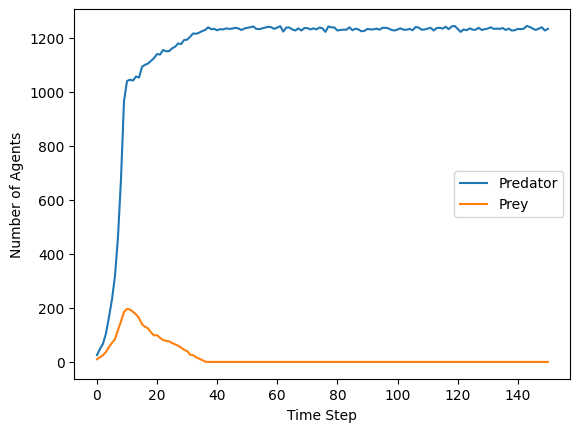

57 Final_State    Pseudo-steady state, predator domination
dtype: object


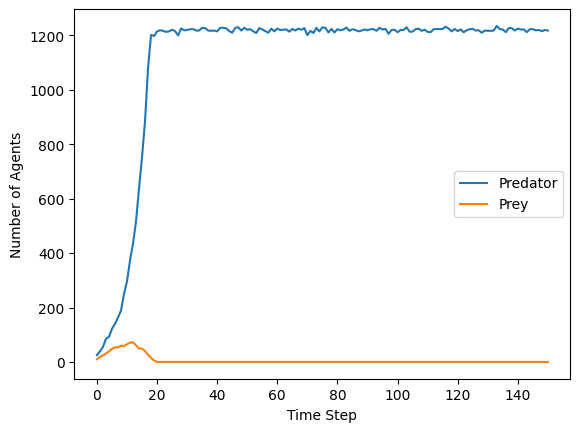

58 Final_State    Pseudo-steady state, predator domination
dtype: object


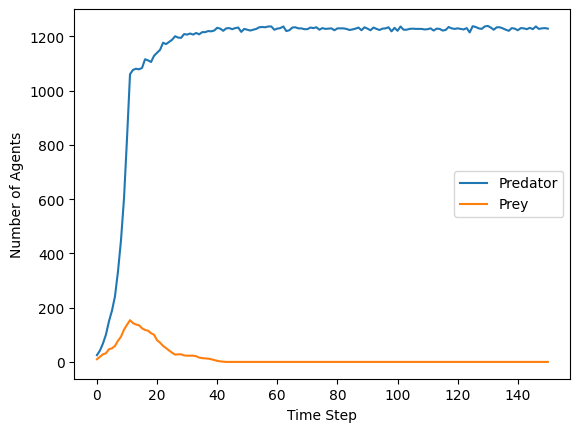

59 Final_State    Pseudo-steady state, predator domination
dtype: object


KeyboardInterrupt: 

In [16]:
# Create a dataframe that summarizes all iterations of the batch run with inital conditions and final classification of the iteration

batch_summary = pd.Series()

for category, frame in batch_by_runs.items():
    initial_conditions = frame.loc[:,["RunId", "num_type_a_1", "num_type_a_2", "is_torus", "grid_height", "grid_width", "immediate_killing", "aggressiveness", "avrg_viability_time_type_a", "A1_Initial_Edge_Distance", "A2_Initial_Edge_Distance", "A1_Initial_Aggressiveness", "A2_Initial_Competition_Index"]].iloc[0]

    n_predator = frame.loc[:, "A1_Number"]
    n_prey = frame.loc[:, "A2_Number"]

    n_steps = pd.Series(frame.loc[:, "Step"].iloc[-1], index=["Steps_Number"])

    n_predator_final = n_predator.iloc[-1]
    n_prey_final = n_prey.iloc[-1]

    predator_slope = abs(n_predator_final - n_predator.iloc[100]) / 500
    prey_slope = abs(n_prey_final - n_prey.iloc[100]) / 500

    #Determine the final state. Steady state is assigned if the slope on the last 500 simualtion steps is less then 0.05
    if n_predator_final == 0 and n_prey_final == 0:
        final_state = pd.Series("No bacteria survival", index=["Final_State"])
    elif n_predator_final != 0 and n_prey_final == 0:
        final_state = pd.Series("Predator domination", index=["Final_State"])
    elif n_predator_final == 0 and n_prey_final != 0:
        final_state = pd.Series("Prey domination", index=["Final_State"])
    elif n_predator_final > n_prey_final:
        if predator_slope < 0.075 and prey_slope < 0.075:
            final_state = pd.Series("Steady state, predator domination", index=["Final_State"])
        else:
            final_state = pd.Series("Predator domination", index=["Final_State"])
    elif n_prey_final >= n_predator_final:
        if predator_slope < 0.075 and prey_slope < 0.75:
            final_state = pd.Series("Steady state, prey domination", index=["Final_State"])
        else:
            final_state = pd.Series("Prey domination", index=["Final_State"])

    time_steps = range(151)

    plt.plot(time_steps, n_predator, label = "Predator")
    plt.plot(time_steps, n_prey, label = "Prey")
    plt.legend()
    plt.xlabel('Time Step')
    plt.ylabel('Number of Agents')
    print(initial_conditions.loc["RunId"],final_state)
    plt.show()

    n_predator_final = pd.Series(n_predator_final, index=["A1_Final_Count"])
    n_prey_final = pd.Series(n_prey_final, index=["A2_Final_Count"])

    predator_slope = pd.Series(predator_slope, index=["A1_Slope"])
    prey_slope = pd.Series(prey_slope, index=["A2_Slope"])

    iteration_summary = pd.concat([final_state, initial_conditions, n_steps, n_predator_final, n_prey_final, predator_slope, prey_slope], axis = 0)
    batch_summary =  pd.concat([batch_summary, iteration_summary], axis = 1)

batch_summary = batch_summary.T
batch_summary = batch_summary.iloc[1:,:]
batch_summary.set_index('RunId', inplace=True)


In [6]:
# Get the summary of our variable of interest

batch_summary.Final_State.value_counts()

Final_State
Pseudo-steady state, predator domination    1234
Predator domination                          155
Steady state, prey domination                125
Steady state, predator domination             79
Prey domination                               27
Name: count, dtype: int64

In [7]:
# Preprocess the batch summary

batch_summary["Predator_vs_Prey"] = batch_summary.loc[:, "num_type_a_1"]/batch_summary.loc[:, "num_type_a_2"]
batch_summary_preprocessed = batch_summary.loc[:,["Predator_vs_Prey", "aggressiveness", "avrg_viability_time_type_a", "A1_Initial_Edge_Distance", "A2_Initial_Edge_Distance", "A1_Initial_Aggressiveness", "A2_Initial_Competition_Index", "A1_Final_Count", "A2_Final_Count"]]


In [8]:
# UMAP implementation

reducer = umap.UMAP(random_state = 10)

# Standadize and scale the data and reduce the dimensions

batch_summary_umap_scaled = StandardScaler().fit_transform(batch_summary_preprocessed)
embedding = reducer.fit_transform(batch_summary_umap_scaled)
embedding.shape

(1620, 2)

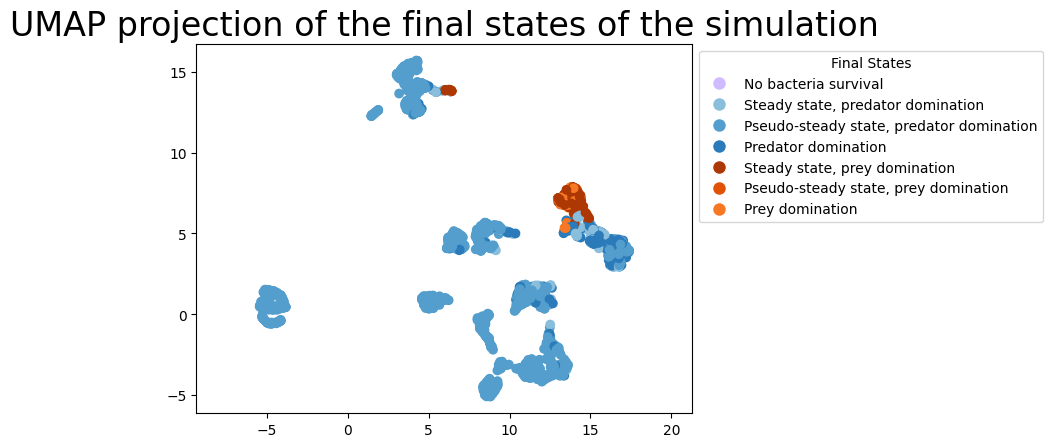

In [9]:
# Plot the UMAP

custom_palette = [
    # sns.color_palette("pastel")[4],   # Pastel Purple
    sns.color_palette("Blues")[2],    # Darker Blue
    sns.color_palette("Blues")[3],    # Medium Blue
    sns.color_palette("Blues")[4],    # Lighter Blue
    sns.color_palette("Oranges")[5],  # Darker Orange
    sns.color_palette("Oranges")[4],  # Medium Orange
    sns.color_palette("Oranges")[3],  # Lighter Orange
]

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[custom_palette[x] for x in batch_summary.Final_State.map(
        {#"No bacteria survival": 0,
        "Steady state, predator domination": 1,
        "Pseudo-steady state, predator domination": 2, 
        "Predator domination": 3,
        "Steady state, prey domination": 4,
        "Pseudo-steady state, prey domination": 5,
        "Prey domination": 6,
        }
        )])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the final states of the simulation', fontsize=24)

# Create a legend
legend_labels = {
    0: "No bacteria survival",
    1: "Steady state, predator domination",
    2: "Pseudo-steady state, predator domination",
    3: "Predator domination",
    4: "Steady state, prey domination",
    5: "Pseudo-steady state, prey domination",
    6: "Prey domination",
}

# Create a list of Patch objects to use for the legend
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=custom_palette[x], markersize=10, label=label) for x, label in legend_labels.items()]

# Add the legend to the plot
plt.legend(handles=legend_patches, title="Final States", bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
for umap_x in range(embedding.shape[1]):

    for feature in batch_summary_umap.keys():

        plt.scatter(
            embedding[:, umap_x],
            batch_summary_umap.loc[:, feature],
            c=[custom_palette[x] for x in batch_summary.Final_State.map(
                {"No bacteria survival": 0,
                "Steady state, predator domination": 1,
                "Pseudo-steady state, predator domination": 2, 
                "Predator domination": 3,
                "Steady state, prey domination": 4,
                "Pseudo-steady state, prey domination": 5,
                "Prey domination": 6,
                }
                )])
    
        plt.ylabel(f"{feature}")
        plt.xlabel(f"UMAP {umap_x+1}")


        # Create a legend
        # legend_labels = {
        #     0: "No bacteria survival",
        #     1: "Steady state, predator domination",
        #     2: "Pseudo-steady state, predator domination",
        #     3: "Predator domination",
        #     4: "Steady state, prey domination",
        #     5: "Pseudo-steady state, prey domination",
        #     6: "Prey domination",
        # }

        # # Create a list of Patch objects to use for the legend
        # legend_patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=custom_palette[x], markersize=10, label=label) for x, label in legend_labels.items()]

        # # Add the legend to the plot
        # plt.legend(handles=legend_patches, title="Final States", bbox_to_anchor=(1, 1))
        plt.show()

In [ ]:
# Function to play around with UMAP parameters
c = [custom_palette[x] for x in batch_summary.Final_State.map(
        {"No bacteria survival": 0,
        "Steady state, predator domination": 1,
        "Pseudo-steady state, predator domination": 2, 
        "Predator domination": 3,
        "Steady state, prey domination": 4,
        "Pseudo-steady state, prey domination": 5,
        "Prey domination": 6,
        }
        )]

def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(random_state = 10,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(batch_summary_umap_scaled)
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c = c)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c = c)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c = c, s=100)
    plt.title(title, fontsize=18)

In [ ]:
# Change number of neighbors: increaing the parameter brings the objects together till they start to separate again

for n in (2, 5, 10, 15, 20, 50, 100, 200):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))